In [16]:
# In this section, we're gonna builda kernel density estimation
# Firstly, import the 'numpy' and 'matplotlib.pyplot' packages
import numpy as np
import matplotlib.pyplot as plt
import math

def ker_smoothing(X, k):
    X = np.sort(X)
    # Compute the range of data vector
    X_min = X[0]
    X_max = X[-1]
    data_points = np.linspace(X_min, X_max, 1000)
    result = np.zeros((1000,))
    if k != 'Uniform' and k != 'Epan' and k != 'Biweight' and k != 'Triweight' and k != 'Gaussian':
        return "Name of the kernel is incorrect!!!"
    else:    
        def ker_density(point, X, k):        
            # Compute the necessary quantities
            sig = np.std(X)
            n = len(X)
            # Next, we construct the functions of kernels
            c = np.array([1.843, 2.345, 2.778, 3.154, 1.059])
            band = c*sig*n**(-1/5)
            matrix = np.array([X,X,X,X,X])
            matrix = matrix.transpose()
            reg_vec = (matrix - point)/band
            def K(x, k):
                vec = np.zeros((n,))
                for i, xi in enumerate(x):
                    if abs(xi) > 1:
                        vec[i] = 0
                    else:
                        if k == 'Uniform':
                            vec[i] = 1/2
                        elif k == 'Epan':
                            vec[i] = 3/4*(1-xi**2)
                        elif k == 'Biweight':
                            vec[i] = 15/16*(1-xi**2)**2
                        elif k == 'Triweight':
                            vec[i] = 35/32*(1-xi**2)**3
                        else:
                            vec[i] = 1/math.sqrt(2*np.pi)*math.exp(-1/2*xi**2)
                return vec
            value = np.zeros((reg_vec.shape[0],reg_vec.shape[1]))
            type_kernel = ["Uniform", "Epan", "Biweight", "Triweight", "Gaussian"]
            for j in range(0, reg_vec.shape[1]-1):
                value[:,j] = K(reg_vec[:,j], type_kernel[j])
            pdf = np.sum(value, axis = 0)
            if k == 'Uniform':
                return pdf[0]
            elif k == 'Epan':
                return pdf[1]
            elif k == 'Biweight':
                return pdf[2]
            elif k == 'Triweight':
                return pdf[3]
            else:
                return pdf[4]
    for i, l in enumerate(data_points):
        result[i] = ker_density(l, X, k)
    fig = plt.figure
    _ = plt.plot(data_points, result)
    return fig

<function matplotlib.pyplot.show(*args, **kw)>

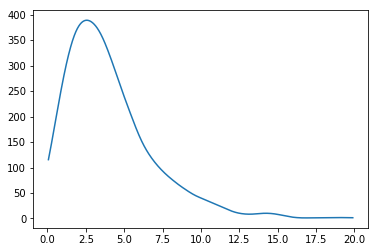

In [12]:
# In this cell, we will extract the data of Yahoo Finance about companies on NASDAQ
# We will investigate the market capitalization of these companies using the kernel density estimator we just constructed
import csv
